In [2]:
import ipywidgets as widgets
slider = widgets.IntSlider(value=5, max=10)
display(slider)

IntSlider(value=5, max=10)

In [1]:
#@title Default title text
import requests  # Import the requests library
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
# Query URL
url = ('https://covid19-healthylk.herokuapp.com/api/districtstotal?startdate=2021-08-31&enddate=2021-09-31')
print(url)
response = requests.get(url)  # Make a GET request to the URL
# Print status code (and associated text)
print(f"Request returned {response.status_code} : '{response.reason}'")
# Print data returned (parsing as JSON)
payload = response.json()  # Parse `response.text` into JSON


https://covid19-healthylk.herokuapp.com/api/districtstotal?startdate=2021-08-31&enddate=2021-09-31
Request returned 200 : 'OK'


In [ ]:

data=pd.json_normalize(payload['data'])
selected=data[["datetext", "counttext","location.formattedAddress"]]
print(selected)

       datetext  counttext              location.formattedAddress
0    2021-09-30        115                    Kalutara, Sri Lanka
1    2021-09-30        156                     Gampaha, Sri Lanka
2    2021-09-30        141                     Colombo, Sri Lanka
3    2021-09-30          9                      Mannar, Sri Lanka
4    2021-09-30         37                 Kilinochchi, Sri Lanka
..          ...        ...                                    ...
636  2021-08-31        360                     Badulla, Sri Lanka
637  2021-08-31         18    Ambagamuwa, Nuwara Eliya, Sri Lanka
638  2021-08-31         15                Nuwara Eliya, Sri Lanka
639  2021-08-31         20  Nuwara Eliya, Nuwara Eliya, Sri Lanka
640  2021-08-31         18    Ambagamuwa, Nuwara Eliya, Sri Lanka

[641 rows x 3 columns]


In [ ]:
pivoted = pd.DataFrame(selected.pivot_table(values='counttext', index='datetext', columns='location.formattedAddress', aggfunc='sum'))
#pivoted = pivoted.set_index('datetext')
print(list(pivoted.columns.values))
#print(pivoted)

['Alawwa, Kurunegala, Sri Lanka', 'Ambagamuwa, Nuwara Eliya, Sri Lanka', 'Ampara, Sri Lanka', 'Anamaduwa, Puttalam, Sri Lanka', 'Anuradhapura, Sri Lanka', 'Arachchikattuwa, Puttalam, Sri Lanka', 'Attanagalla, Gampaha, Sri Lanka', 'Badalkumbura, Monaragala, Sri Lanka', 'Badulla, Badulla, Sri Lanka', 'Badulla, Sri Lanka', 'Ballapana, Gampaha, Sri Lanka', 'Bamunakotuwa, Kurunegala, Sri Lanka', 'Bandarawela, Badulla, Sri Lanka', 'Batticaloa, Sri Lanka', 'Bibile, Monaragala, Sri Lanka', 'Biyagama - WP, Gampaha, Sri Lanka', 'Bogawantalawa, Nuwara Eliya, Sri Lanka', 'Buttala, Monaragala, Sri Lanka', 'Chilaw, Puttalam, Sri Lanka', 'Colombo, Sri Lanka', 'Dambadeniya, Kurunegala, Sri Lanka', 'Divulapitiya, Gampaha, Sri Lanka', 'Dompe, Gampaha, Sri Lanka', 'Ella Rock house, Badulla, Sri Lanka', 'Galgamuwa, Kurunegala, Sri Lanka', 'Galle, Sri Lanka', 'Gampaha, Gampaha, Sri Lanka', 'Gampaha, Sri Lanka', 'Girandurukotte, Badulla, Sri Lanka', 'Gokarella, Kurunegala, Sri Lanka', 'Haldummulla, Badulla,

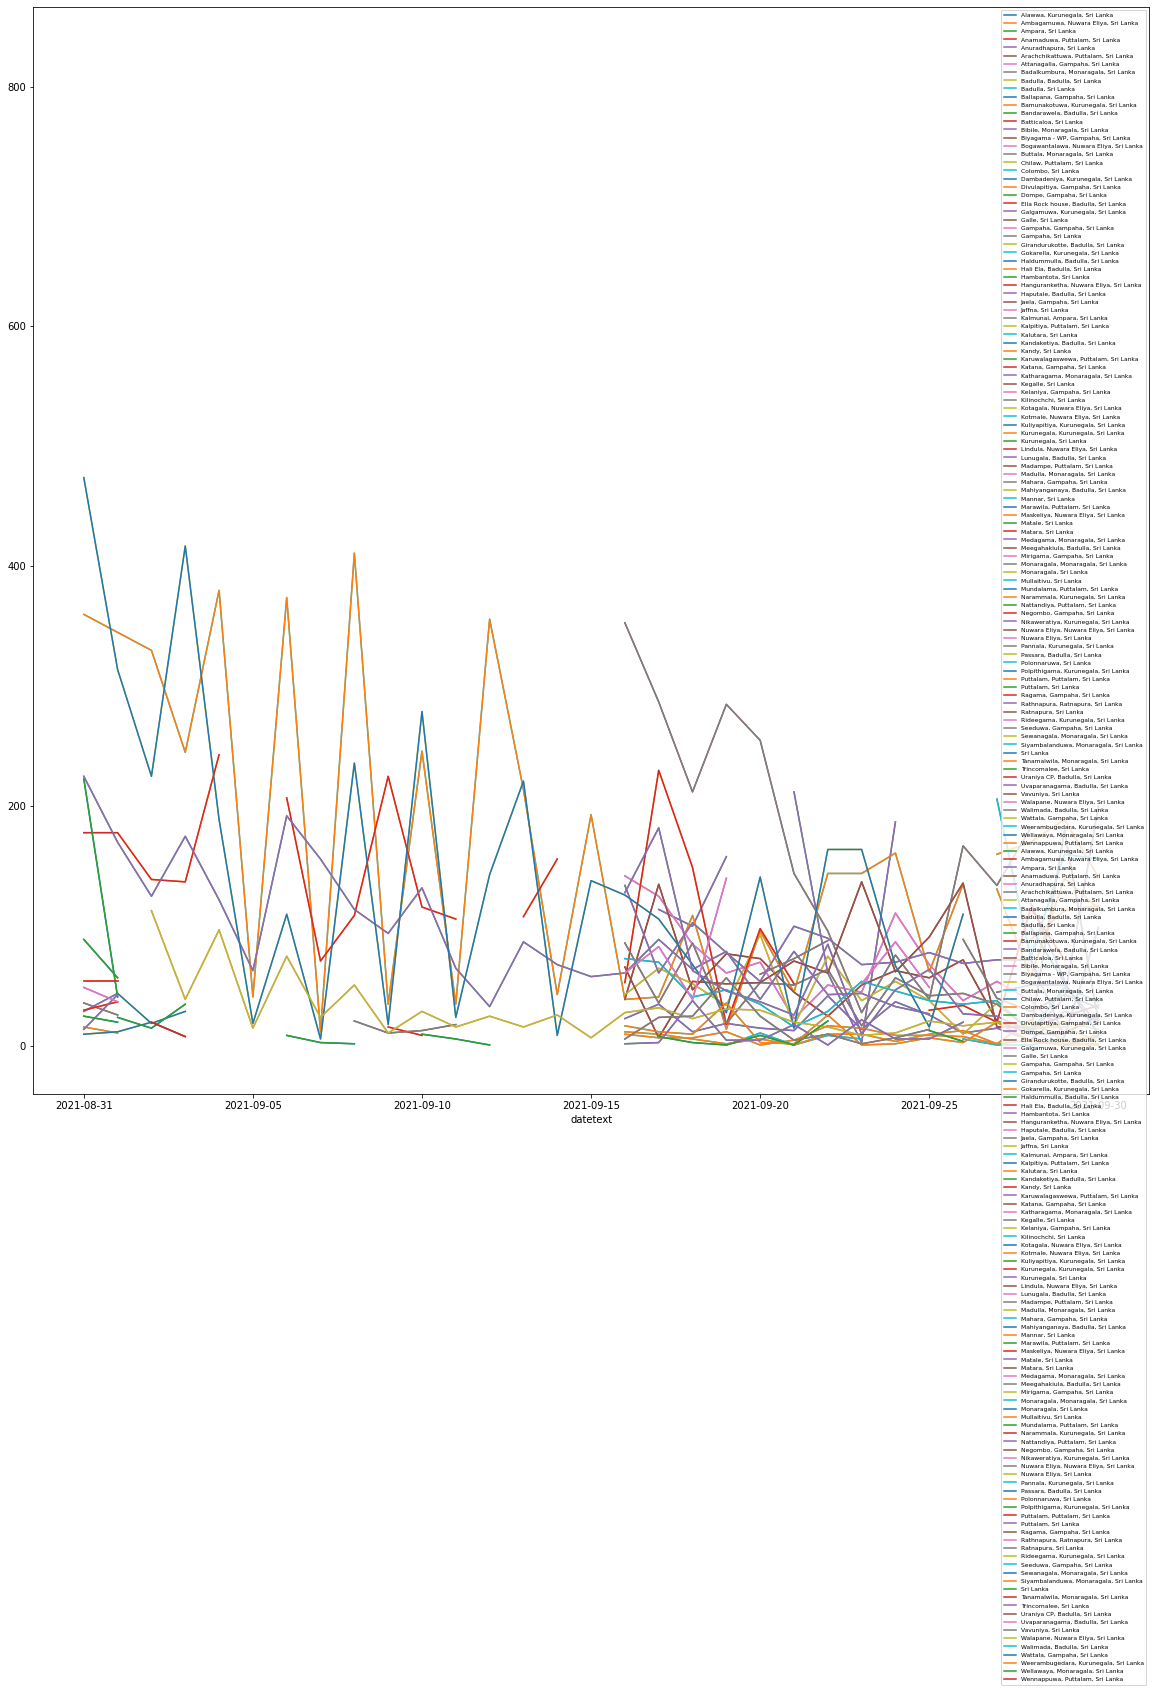

In [ ]:
# figure size globally set for matplotlib
mpl.rcParams['figure.figsize'] = (20, 20)
mpl.rcParams['axes.grid'] = False

ax = pivoted.plot()
#ax.set_color_palette(sns.color_palette("muted"))
pivoted.plot(ax=ax)
plt.legend(loc='best',prop={'size': 6}) 
plt.show() 

In [ ]:
#for k in payload['data']:
    #print(k)


#import pprint
#pp = pprint.PrettyPrinter(indent=1)
#pp.pprint(payload)

#df = pd.DataFrame(payload['data'])
#print (df['location'])